In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams["lines.linewidth"] = 1.5


In [11]:
data = pd.read_csv("../data/TD3BCHalfCheetah.csv")
data.columns


Index(['Step',
       'Prod-TD3-BC-alpha20-noACLN-halfcheetah-medium-v2-40600f64 - d4rl_normalized_score',
       'Prod-TD3-BC-alpha20-noACLN-halfcheetah-medium-v2-40600f64 - d4rl_normalized_score__MIN',
       'Prod-TD3-BC-alpha20-noACLN-halfcheetah-medium-v2-40600f64 - d4rl_normalized_score__MAX',
       'Prod-TD3-BC-pretrainBC10k-alpha20-halfcheetah-medium-v2-c365d460 - d4rl_normalized_score',
       'Prod-TD3-BC-pretrainBC10k-alpha20-halfcheetah-medium-v2-c365d460 - d4rl_normalized_score__MIN',
       'Prod-TD3-BC-pretrainBC10k-alpha20-halfcheetah-medium-v2-c365d460 - d4rl_normalized_score__MAX',
       'Prod-TD3-BC-pretrainAC10k-alpha20-halfcheetah-medium-v2-8d6bc69a - d4rl_normalized_score',
       'Prod-TD3-BC-pretrainAC10k-alpha20-halfcheetah-medium-v2-8d6bc69a - d4rl_normalized_score__MIN',
       'Prod-TD3-BC-pretrainAC10k-alpha20-halfcheetah-medium-v2-8d6bc69a - d4rl_normalized_score__MAX',
       'Prod-TD3-BC-alpha20-halfcheetah-medium-v2-d14e8092 - d4rl_normalized_score',


In [12]:
data = data[data["Step"] < 200001]


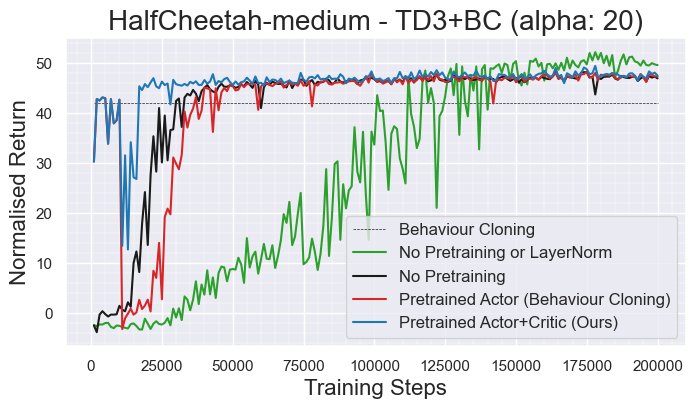

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(
    data["Step"],
    42 * np.ones_like(data["Step"]),
    label="Behaviour Cloning",
    linestyle="--",
    color="k",
    linewidth=0.5,
)
ax.plot(
    data["Step"],
    data[
        "Prod-TD3-BC-alpha20-noACLN-halfcheetah-medium-v2-40600f64 - d4rl_normalized_score"
    ],
    label="No Pretraining or LayerNorm",
    color="tab:green",
)
ax.plot(
    data["Step"],
    data["Prod-TD3-BC-alpha20-halfcheetah-medium-v2-d14e8092 - d4rl_normalized_score"],
    label="No Pretraining",
    color="k",
)
ax.plot(
    data["Step"],
    data[
        "Prod-TD3-BC-pretrainBC10k-alpha20-halfcheetah-medium-v2-c365d460 - d4rl_normalized_score"
    ],
    label="Pretrained Actor (Behaviour Cloning)",
    color="tab:red",
)
ax.plot(
    data["Step"],
    data[
        "Prod-TD3-BC-pretrainAC10k-alpha20-halfcheetah-medium-v2-8d6bc69a - d4rl_normalized_score"
    ],
    label="Pretrained Actor+Critic (Ours)",
    color="tab:blue",
)
ax.legend(loc="lower right", fontsize=12)
ax.set_title("HalfCheetah-medium - TD3+BC (alpha: 20)", fontsize=20)
ax.set_xlabel("Training Steps", fontsize=16)
ax.set_ylabel("Normalised Return", fontsize=16)
ax.grid(visible=True, which="major")
ax.grid(visible=True, which="minor", linewidth=0.3)
ax.minorticks_on()
plt.show()
# fig.savefig("../plots/TD3BCHalfCheetah.pdf")
